<a href="https://colab.research.google.com/github/smahesh2694/NEU_XAI/blob/master/SHAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import os
import keras
import cv2
import matplotlib.pyplot as plt
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model
from keras.optimizers import Adam,SGD
from skimage.segmentation import mark_boundaries
from xml.etree import ElementTree

In [37]:
saved_model = load_model('/content/drive/My Drive/xai_model/model_23.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:350: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [38]:
saved_model.layers[0].input_shape

(None, None, None, 3)

In [0]:
image_path="/content/drive/My Drive/NEU orig/Pa/Pa_12.bmp"

In [0]:
shap_Cr = '/content/drive/My Drive/NEU orig/Cr/*.bmp'
shap_In = '/content/drive/My Drive/NEU orig/In/*.bmp'
shap_PS = '/content/drive/My Drive/NEU orig/PS/*.bmp'
shap_Pa = '/content/drive/My Drive/NEU orig/Pa/*.bmp'
shap_RS = '/content/drive/My Drive/NEU orig/RS/*.bmp'
shap_Sc = '/content/drive/My Drive/NEU orig/Sc/*.bmp'

shap_data = [shap_Cr, shap_In, shap_PS, shap_Pa, shap_RS, shap_Sc]

In [0]:
labels = {0: 'Crazing', 1: 'Inclusion', 2: 'Pitted Surface', 3: 'Patches', 4: 'Rolled-in Scale', 5: 'Scratches'}

[3]
[[1.5732998e-02 1.5205887e-04 4.3540675e-04 9.8298579e-01 1.4687965e-05
  6.7898299e-04]]
Patches


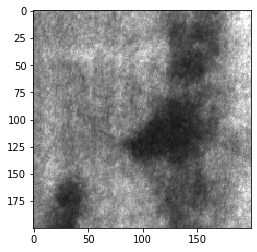

In [61]:
img = image.load_img(image_path, target_size=(200,200))
plt.imshow(img)

img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
result = saved_model.predict(img)

prediction = result.argmax(axis=-1)
print(prediction)
output = labels[int(prediction)]

print(result)
print(output)

In [62]:
img.shape

(1, 200, 200, 3)

In [0]:
b_img = cv2.imread(image_path)
b_img = np.expand_dims(b_img, axis=0)
b_img = preprocess_input(b_img)

In [45]:
b_img.shape

(1, 200, 200, 3)

In [46]:
!pip install shap

In [85]:
%%time
import glob
cv_img = []

for i in range(len(shap_data)):
  for ig in glob.glob(shap_data[i]):
    n = cv2.imread(ig)
    cv_img.append(n)

oo = np.array(cv_img)

CPU times: user 547 ms, sys: 1.92 s, total: 2.47 s
Wall time: 6.24 s


In [86]:
oo.shape

(1800, 200, 200, 3)

In [49]:
oo[[16]].shape

(1, 200, 200, 3)

In [0]:
#plt.imshow(oo[16])

In [0]:
#plt.imshow(oo[[16][0]])

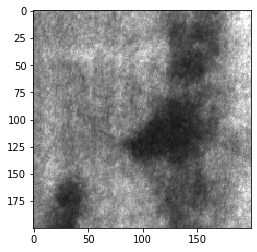

In [70]:
shap_test = image.load_img(image_path) #, grayscale=True)
plt.imshow(shap_test)

shap_test = image.img_to_array(shap_test)
shap_test = np.expand_dims(shap_test, axis=0)
#shap_test = preprocess_input(shap_test)

In [53]:
shap_test.shape

(1, 200, 200, 3)

In [0]:
#plt.imshow(shap_test[0])

In [0]:
#for i in range(len(saved_model.layers)):
#  print(i , saved_model.layers[i])

In [87]:
%%time
import keras.backend as K
import shap
m = 15

def map2layer(x, layer):
  feed_dict = dict(zip([saved_model.layers[0].input], [preprocess_input(x.copy())]))  
  return K.get_session().run(saved_model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((saved_model.layers[m].input, saved_model.layers[-1].output), map2layer(preprocess_input(oo.copy()),m)) #, local_smoothing=0)

shap_values, indexes = e.shap_values(map2layer(shap_test, m), ranked_outputs=2)

index_names = np.vectorize(lambda l: labels[l])(indexes)

shap.image_plot(shap_values, shap_test, index_names)

ResourceExhaustedError: ignored

In [56]:
%%time
import keras.backend as K
import shap
m = 15

def map2layer(x, layer):
  feed_dict = dict(zip([saved_model.layers[0].input], [preprocess_input(x.copy())]))  
  return K.get_session().run(saved_model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((saved_model.layers[m].input, saved_model.layers[-1].output), map2layer(preprocess_input(oo.copy()),m)) #, local_smoothing=0)

shap_values, indexes = e.shap_values(map2layer(shap_test, m), ranked_outputs=2)

index_names = np.vectorize(lambda l: labels[l])(indexes)

shap.image_plot(shap_values, shap_test, index_names)

ResourceExhaustedError: ignored

In [0]:
indexes

In [0]:
7from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import shap
import keras.backend as K
import json

# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
to_explain = X[[39]]

url = "https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json"
fname = shap.datasets.cache(url)
with open(fname) as f:
    class_names = json.load(f)

In [0]:
def map2layer(x, layer):
    feed_dict = dict(zip([saved_model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(saved_model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((saved_model.layers[7].input, saved_model.layers[-1].output), map2layer(preprocess_input(X.copy()), 7))

shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=6)

index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

shap.image_plot(shap_values, to_explain, index_names)

In [0]:
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)

e = shap.GradientExplainer((model.layers[7].input, model.layers[-1].output), map2layer(preprocess_input(X.copy()), 7))

shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=6)

index_names = np.vectorize(lambda x: class_names[str(x)][1])(indexes)

shap.image_plot(shap_values, to_explain, index_names)

In [0]:
model.layers

In [0]:
X.shape

In [0]:
to_explain.shape